In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

### Working with Moore's law

Moore's law is the observation that the number of transistors in a dense integrated circuit doubles about every two years.

$ C = A_{0}r^t $

$ logC = logr * t + logA_{0} $

Comparing this with $ y = wx + b $
- $ y = logC $
- $ w = logr $
- $ x = t $
- $ b = logA_{0} $

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv",
                 header=None)
df.head(3)

,0,1
0,1971,2300
1,1972,3500
2,1973,2500


In [4]:
data = df.values

In [5]:
X = data[:, 0].reshape(-1, 1)
# conver X to 2-D array because keras expects it to be a 2-D array
y = data[:, 1]

In [7]:
X.shape, y.shape

((162, 1), (162,))

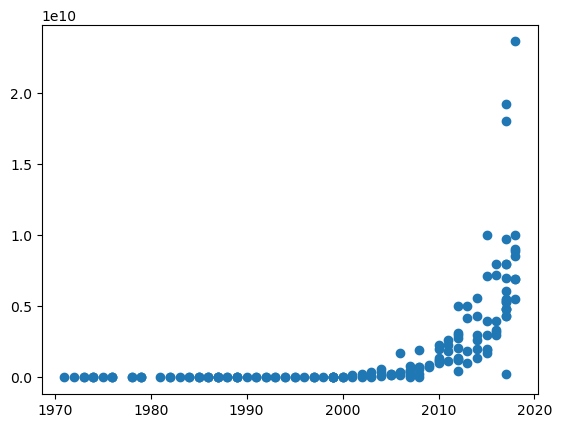

In [9]:
plt.scatter(X, y);

From the scatter plot, it doesn't look like it's linear. So we need convert the data with `log` to make it linear

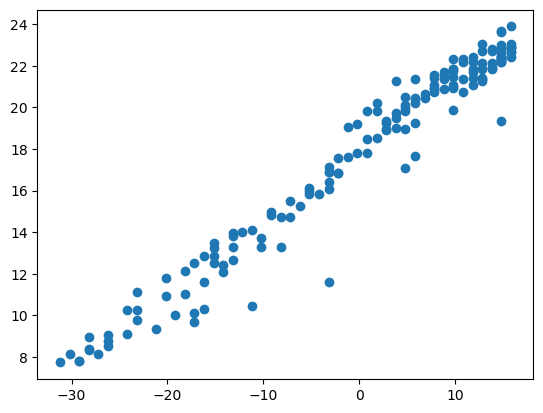

In [7]:
Y = np.log(y)
plt.scatter(X, Y);

The X data seems too large, try to center the X data

In [6]:
X = X - X.mean()

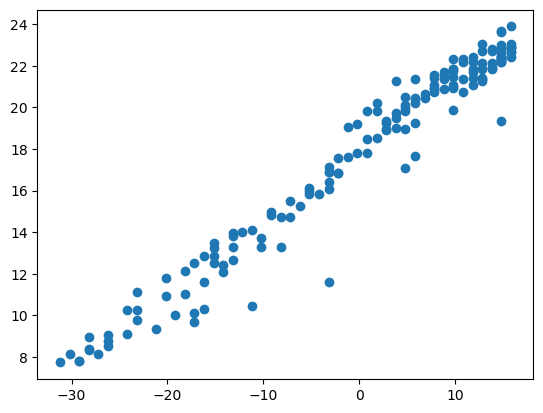

In [29]:
plt.scatter(X, Y);

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [9]:
# SGD(learning_rate, momentum)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

In [10]:
# learning rate scheduler
def schedule(epoch, lr):
    if(epoch >= 50):
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [11]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 3s 19ms/sample - loss: 337.4224
Epoch 2/200
162/162 [==============================] - 0s 173us/sample - loss: 283.3684
Epoch 3/200
162/162 [==============================] - 0s 117us/sample - loss: 252.3896
Epoch 4/200
162/162 [==============================] - 0s 136us/sample - loss: 253.9205
Epoch 5/200
162/162 [==============================] - 0s 154us/sample - loss: 229.1034
Epoch 6/200
162/162 [==============================] - 0s 142us/sample - loss: 165.3430
Epoch 7/200
162/162 [==============================] - 0s 105us/sample - loss: 187.0006
Epoch 8/200
162/162 [==============================] - 0s 148us/sample - loss: 133.3768
Epoch 9/200
162/162 [==============================] - 0s 148us/sample - loss: 77.3475
Epoch 10/200
162/162 [==============================] - 0s 117us/sample - loss: 45.3968
Epoch 11/200
162/162 [==============================] - 0s 154us/sample - loss: 31.2656
Epoch 12/200


162/162 [==============================] - 0s 210us/sample - loss: 0.8724
Epoch 95/200
162/162 [==============================] - 0s 142us/sample - loss: 0.8806
Epoch 96/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8846
Epoch 97/200
162/162 [==============================] - 0s 136us/sample - loss: 0.8739
Epoch 98/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8749
Epoch 99/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8893
Epoch 100/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8877
Epoch 101/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8707
Epoch 102/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8711
Epoch 103/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8791
Epoch 104/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8855
Epoch 105/200
162/162 [============================

162/162 [==============================] - 0s 111us/sample - loss: 0.8739
Epoch 188/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8782
Epoch 189/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8704
Epoch 190/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8793
Epoch 191/200
162/162 [==============================] - 0s 123us/sample - loss: 0.8797
Epoch 192/200
162/162 [==============================] - 0s 130us/sample - loss: 0.8730
Epoch 193/200
162/162 [==============================] - 0s 154us/sample - loss: 0.8753
Epoch 194/200
162/162 [==============================] - 0s 130us/sample - loss: 0.8798
Epoch 195/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8753
Epoch 196/200
162/162 [==============================] - 0s 99us/sample - loss: 0.8708
Epoch 197/200
162/162 [==============================] - 0s 130us/sample - loss: 0.8787
Epoch 198/200
162/162 [========================

In [13]:
dir(r)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [18]:
r.history.keys()

dict_keys(['loss', 'lr'])

In [22]:
r.history["loss"]

[337.422435619213,
 283.36835621021413,
 252.38959945867092,
 253.92045404881605,
 229.10336315484693,
 165.34297761799377,
 187.0005874633789,
 133.37679808816793,
 77.34747757146388,
 45.396808153317295,
 31.265606821319203,
 23.44203520409855,
 18.261330074734158,
 13.211617664054588,
 14.232367621527779,
 8.16053902661359,
 7.431989616817898,
 4.491573957749355,
 3.252801268189042,
 2.7195461708822366,
 2.774023209089114,
 3.212536800054856,
 3.4952486120624306,
 2.1622295718134183,
 2.0202248920629056,
 1.1641358034110363,
 1.0985899760767266,
 1.1061054291548553,
 0.9949172131809187,
 1.1046452036610357,
 1.0091524856326022,
 0.958481749266754,
 0.9979429355374089,
 1.243188472441685,
 0.9689166198519094,
 0.9196366998884413,
 1.0313983463946683,
 1.0418670950112519,
 0.9735044285103127,
 1.4073945710688462,
 1.3541348701641884,
 1.4670747386084662,
 1.1032898308318337,
 0.8216763484625169,
 1.531733994130735,
 1.5325931943493125,
 1.2284346269788566,
 0.9712819670453484,
 0.9848

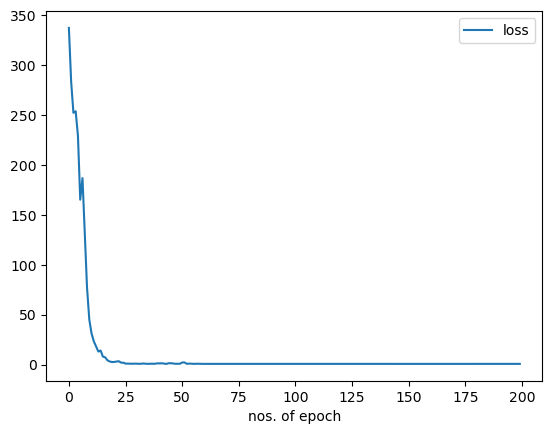

In [24]:
plt.plot(r.history["loss"], label="loss")
plt.xlabel("nos. of epoch")
plt.legend();

In [21]:
print(model.layers)

In [22]:
print(model.layers[0].get_weights())

[array([[0.33739436]], dtype=float32), array([17.759535], dtype=float32)]


In [27]:
# slope, w
w = model.layers[0].get_weights()[0][0,0]
w

0.33739436

In [30]:
y_pred = model.predict(X)

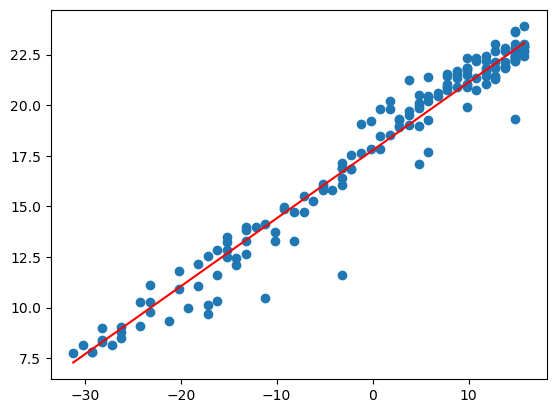

In [34]:
plt.scatter(X, Y)
plt.plot(X, y_pred, c="red");

From above, we know $ w = logr $

So, $ r = e^w = e^{0.33739436} = 1.4013 $

According to Moore's law at time `t`: $ C = A_{0}r^t $ ... ...`equation-1`

At time `t'` it should be: $ 2C = A_{0}r^{t'} $ ... ... ... ... ... ...`equation-2`

eqn2/eqn1: $ \frac{2C}{C} = \frac{A_{0}r^{t'}}{A_{0}r^t} $

=> $ 2 = r^{t' - t} $

=> $ t' - t = \frac{log2}{logr} $

=> $ t' - t = \frac{log2}{w} $

=> $ \Delta t = \frac{log2}{0.33739436} \approx 2 $

In [29]:
print(f"Time to double: {np.log(2) / w}")

Time to double: 2.0544124901281826


So the Moore's law is true